In [ ]:
import numpy as np                     # Para porcesar matrices y vectores
import imageio                         # Para cargar las imágenes
import matplotlib.pyplot as plt        # Para graficar
from scipy import ndimage              # Para rotar imagenes
from scipy import signal               # Para aplicar filtros
from scipy import stats                # Para ajustar
from scipy.optimize import curve_fit   # Para realizar ajustes
import pandas as pd                    # Para cargar los datos de ImageJ

# Arrancar desde aca si quieren analizar la imagen en python. Si tienen datos de ImageJ o Fiji, arranquen desde mas abajo

In [ ]:
plt.rcParams['figure.figsize'] = [9,9]
plt.rcParams['font.size'] = 20

<ipython-input-3-087a9560e552>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen = imageio.imread('A-patron-difraccion.jpg')


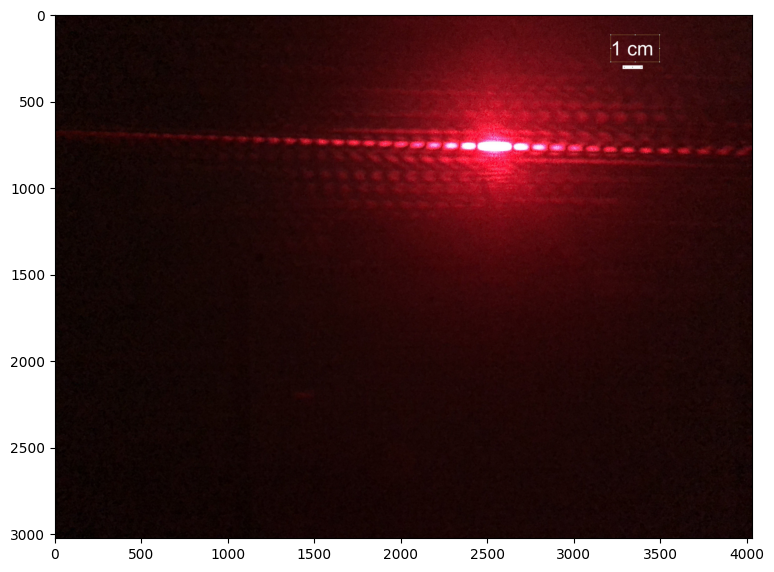

In [ ]:
# Cargo y visualizo la imagen
imagen = imageio.imread('A-patron-difraccion.jpg')
plt.imshow(imagen)

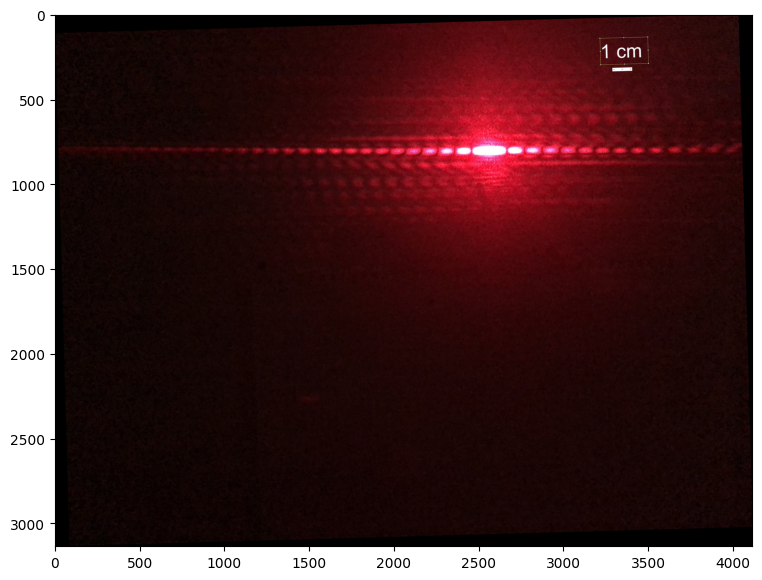

In [ ]:
# Alineo la imagen con el patron
angulo = 1.6 # angulo de la rotacion en grtados
imagen_derecha = ndimage.rotate(imagen, angulo)
plt.imshow(imagen_derecha)

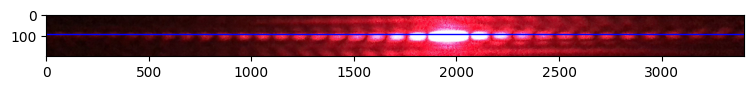

In [ ]:
# Recorto el area correspondiente al patron, linea para facilitar la alineación
patron = imagen_derecha[700:900,600:4000]
plt.imshow(patron)
plt.plot([0,3399],[92,92], c = 'b', lw = 1)

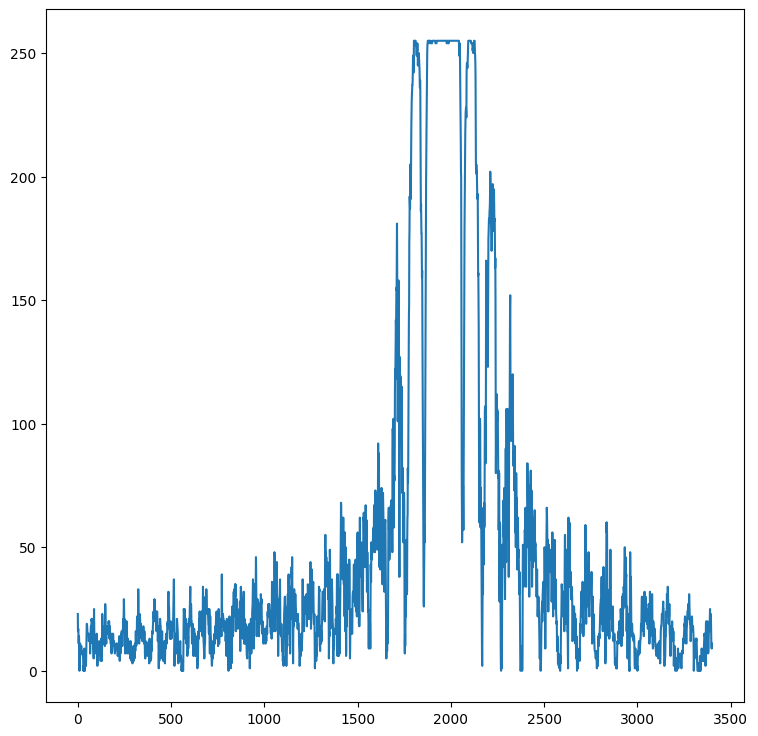

In [ ]:
# Recupero los valore de intensidad de los pixeles correspondiente al patron
intensidad = patron[92,:,1] # agarro un única fila de píxeles, la 92 en este caso
plt.plot(intensidad)
"""
Las imágenes de las cámaras en general tienen 3 canales rojo, verde y azul (RGB)
con el último número de los corchetes pueden acceder a cada uno de los canales
0 = rojo
1 = verde
2 = azul
Cuál canal reproduce más fielmente el patrón? Cómo se podrían usar información de los 3?
"""


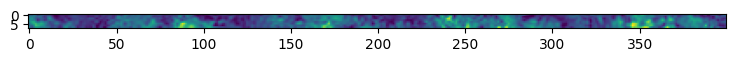

In [ ]:
# Realizo un recorte mas fino de los pixels con senal, en este caso entre 88 y 96
# variar estos valores para determinar el rango óptimo en sus mediciones
plt.imshow(patron[88:96,600:1000,1], cmap = "gray")

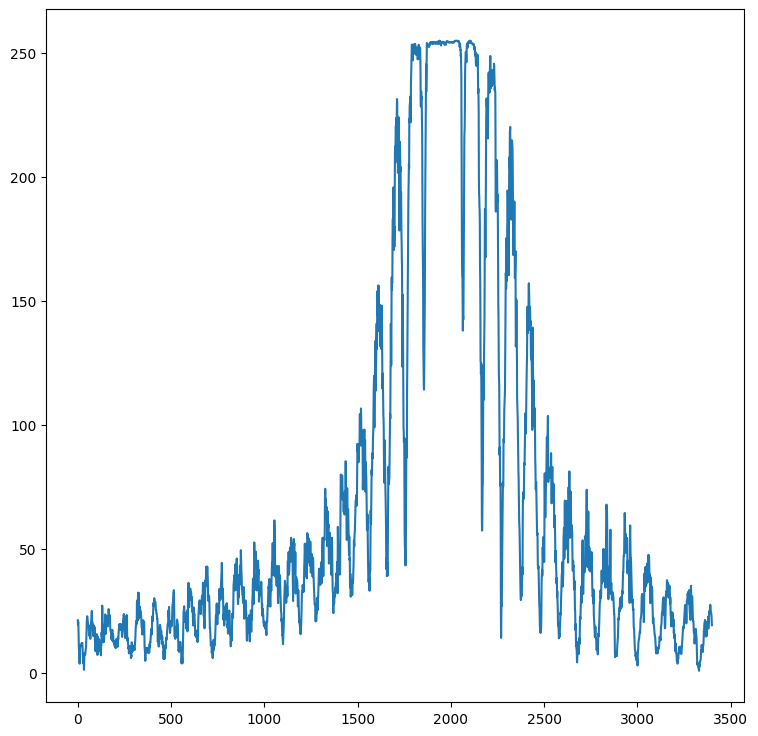

In [ ]:
# Recupero los valore de intensidad de los pixeles correspondiente al patron
# de esta forma se usa la información de muchas filas de píxeles
intensidad_1 = np.mean(patron[90:98,:,2], 0)
plt.plot(intensidad_1)

# Arrancar desde aca si tienen datos de ImageJ o o Fiji.

In [ ]:
data = pd.read_csv('my_file.csv',header=None,skiprows = 1)
intensidad_1 = data[1].values

'\nLa función find peaks está escrita para la detección de máximos, acá se usa para detectar mínimos,\npara esto se ejecuta en "la señal invertida" (multiplicada por -1). Tiene muchos parámetros\ndocumentación: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html\nde estos, distance y threshold son los más relevantes en este caso, qué significa cada uno?\n'

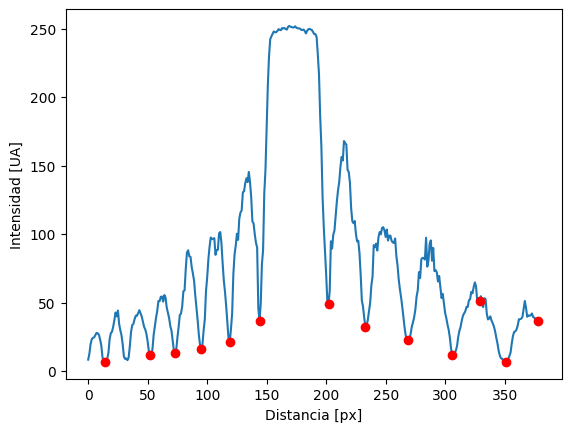

In [ ]:
# Identifico los minimos de la senal de manera semiautomatica
minimos = signal.find_peaks(-intensidad_1, distance = 20, threshold = 0, height=-200)[0]
plt.plot(intensidad_1)
plt.plot( minimos, intensidad_1[minimos], 'o', c = 'r' )
plt.xlabel("Distancia [px]") # REVISAR UNIDADES
plt.ylabel("Intensidad [UA]")
"""
La función find peaks está escrita para la detección de máximos, acá se usa para detectar mínimos,
para esto se ejecuta en "la señal invertida" (multiplicada por -1). Tiene muchos parámetros
documentación: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
de estos, distancen threshold y height son los más relevantes en este caso, qué significa cada uno?
Presten atención qu en este ejemplo no todos los picos detectados corresponden a un mínimo.
"""

In [ ]:
"""
¡Ojo con el indice de cada minimo! La funcion no devuelve dicho indice; requiere analisis manual. ¿Que pasa con m = 0? ¿Lo pudieron obtener?
"""

Text(0, 0.5, 'Ubicación de los mínimos [px]')

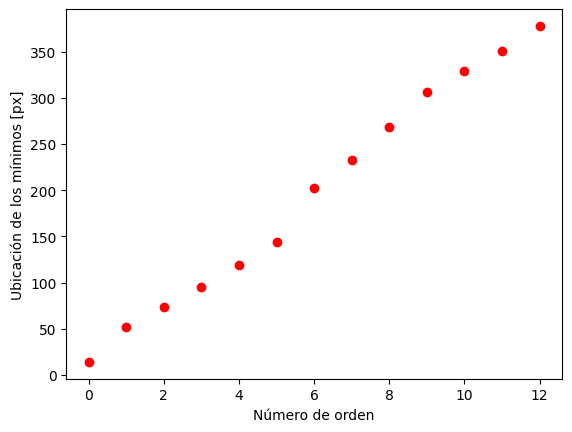

In [ ]:
m = np.arange(len(minimos)) # indices desde el 1er pico a la izquirda --> corregir
plt.plot(m, minimos,'o',c = 'r')
plt.xlabel("Número de orden")
plt.ylabel("Ubicación de los mínimos [px]") # REVISAR UNIDADES


In [ ]:
def recta(x, m, b):
    return m*x+b

Text(0, 0.5, 'Ubicación de los mínimos [px]')

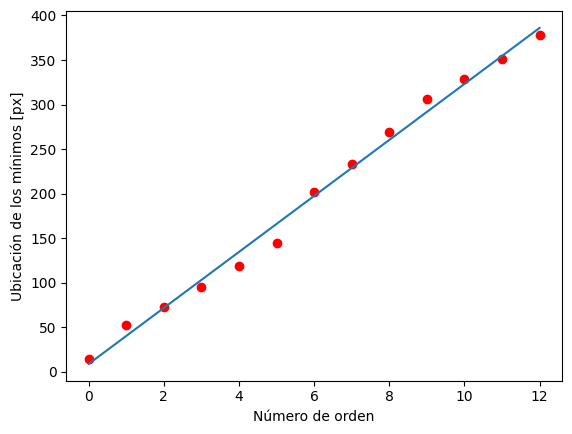

In [ ]:
popt, pcov = curve_fit( recta, m, minimos ) # ajuste a las posciciones de los mínimos
plt.plot(m, minimos,'o',c = 'r')
plt.plot(m, recta(m,*popt))
plt.xlabel("Número de orden")
plt.ylabel("Ubicación de los mínimos [px]") # REVISAR UNIDADES

In [ ]:
"""
Este código sirve para obtener la pendiente, pero no está en las unidades que queremos. En qué unidades está?
En esta última parte les proponemos que controlen las unidades de la pendiente y determinen la apaertura de la rendija.
Para esto, los que hayan hecho todo en python van a tener que determinar la relación entra pixeles y mm de su imagen.
Se animan a hacerlo en python? Siempre pueden hacerlo en Fiji también.
"""


'\nEste código sirve para obtener la pendiente, pero no está en las unidades que queremos. En qué unidades está?\nEn esta última parte les proponemos que controlen las unidades de la pendiente y determinen la apaertura de la rendija.\nPara esto, los que hayan hecho todo en python van a tener que determinar la relación entra pixeles y mm de su imagen.\nSe animan a hacerlo en python? Siempre pueden hacerlo en Fiji también.\n'